In [1]:
# ###################################################
# Change current directory to the root of the project
import os
from pathlib import Path
current_dir = Path(os.getcwd())
os.chdir(current_dir.parents[1])
# ###################################################

In [2]:
import torch
import matplotlib.pyplot as plt
from cir.benchmarks.cir_sampling_based import cir_cifar100
from cir.utils.notebook_plot_utils import plot_scenario_transition, print_scenario_details



Generating benchmark 1/6 ...
Files already downloaded and verified
Files already downloaded and verified

Generating benchmark 2/6 ...
Files already downloaded and verified
Files already downloaded and verified

Generating benchmark 3/6 ...
Files already downloaded and verified
Files already downloaded and verified

Generating benchmark 4/6 ...
Files already downloaded and verified
Files already downloaded and verified

Generating benchmark 5/6 ...
Files already downloaded and verified
Files already downloaded and verified

Generating benchmark 6/6 ...
Files already downloaded and verified
Files already downloaded and verified


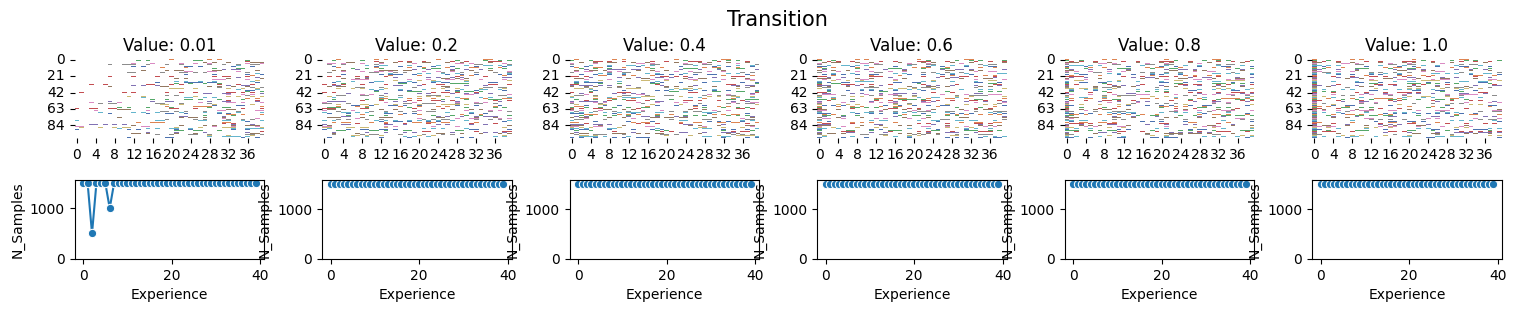

In [3]:
benchmarks = []
scenario_tables = []
n_samples_per_exp_list = []

variable_values = [0.01, 0.2,  0.4,  0.6,  0.8, 1.0]

for i, value in enumerate(variable_values):
    print(f"\nGenerating benchmark {i+1}/{len(variable_values)} ...")

    dataset_root = "./data/datasets"
    dist_first_occurrence = {'dist_type': 'geometric', 'p': value}
    dist_recurrence = {'dist_type': 'fixed', 'p': 0.2}
    benchmark = cir_cifar100(
        dataset_root=dataset_root,
        n_e=40,
        s_e=1500,
        dist_first_occurrence=dist_first_occurrence,
        dist_recurrence=dist_recurrence,
        seed=2
    )

    benchmarks.append(benchmark)
    scenario_tables.append(benchmark.details["stream_table"],)
    n_samples_per_exp_list.append(benchmark.details["n_samples_per_exp"])

plot_scenario_transition(scenario_tables, n_samples_per_exp_list, "Transition", variable_values)
plt.savefig("./transition.pdf")